# Distributions.jl

The [`Distributions`](https://juliastats.org/Distributions.jl/stable/) package provides an interface for writing probability-distribution-agnostic code: sampling distributions and getting pdfs, using moments, and more. This means that you can write any code that uses a probability distribution without having to care about the distribution's specifics. The result: your code can be run with _any_ probability distribution!

> _Note: the package targets applications scenarios where continuous probability density functions with analytically known expressions are used (and optionally fitted to the data). For extracting discrete probability mass functions from input data using a plethora of different discretization methods, see [ComplexityMeasures.jl](https://juliadynamics.github.io/ComplexityMeasures.jl/stable/)._

The way it works is quite straightforward: `Distributions` provides a unified API around abstract types representing probability distributions. To keep things simple here we limit ourselves to univariate continuous distributions.

In [ ]:
# import Pkg; Pkg.add("Distributions")
using Distributions
d = Normal(0.1, 0.25)

Normal{Float64}(μ=0.1, σ=0.25)

In [ ]:
supertype(typeof(d))

Distribution{Univariate, Continuous}

Various distribution-related quantities can be extracted using `Distributions`, by utilizing the analytic form of a specific distribution. For example:

In [ ]:
pdf(d, 0.1) # probability density function at x = 0.1

1.5957691216057308

In [ ]:
std(d)

0.25

Arguably one of the most important features for `Distributions` is that these objects can be used as samplers in the `rand` function.

In [ ]:
rand()

0.7842942866862395

In [ ]:
rand(d) # sample a random variable distributed according to `d`

-0.030833852779358933

In [ ]:
rand(d, 10, 10)

10×10 Matrix{Float64}:
  0.0226904  -0.186221   0.207519     …  -0.206264    0.186202   -0.355476
  0.307782    0.198924   0.170329         0.326716    0.202703    0.00967445
  0.149832    0.391123  -0.0491144        0.0800431  -0.263947    0.524905
  0.21086     0.187761   0.144798         0.424593    0.0234496  -0.137907
  0.120009   -0.220957   0.00428938       0.3207      0.389197    0.26875
  0.430792    0.519997   0.104194     …  -0.494337   -0.114659    0.0972525
 -0.0263616  -0.467017   0.166822         0.15699     0.1659      0.39532
 -0.34783     0.142698  -0.000982136      0.204591    0.216254   -0.0898502
 -0.157282    0.630275   0.21723         -0.0238945   0.448418    0.545272
  0.315859   -0.059332   0.184502        -0.0329284   0.264766    0.562533

And all of this works for any subtype of `Distribution`:

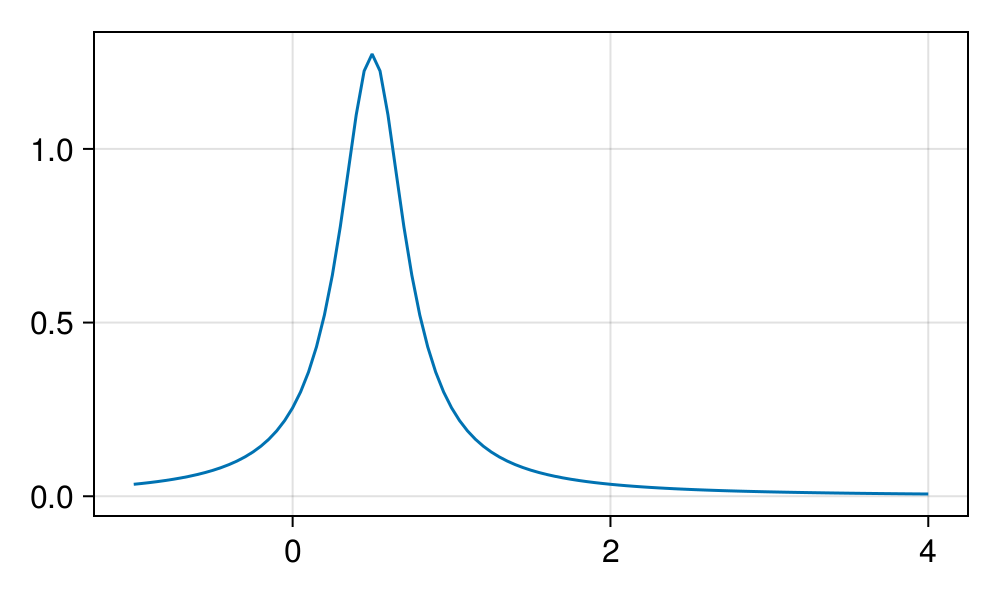

In [ ]:
using CairoMakie
cauchy = Cauchy(0.5, 0.25)
x = range(-1, 4; length = 101)
lines(x, pdf.(cauchy, x))

In [ ]:
rand(cauchy)

0.4693745952491657

In [ ]:
std(cauchy)

NaN

In [ ]:
quantile(cauchy, 0.5)

0.5

You can also create your own distribution by extending a small amount of methods!

Or, you can use the `fit` function, to fit a distribution to an e.g. experimental measurement:

In [ ]:
x = randn(5000);
cauchyfit = fit(Cauchy, x)

Cauchy{Float64}(μ=0.020353647771362726, σ=0.682891286800565)

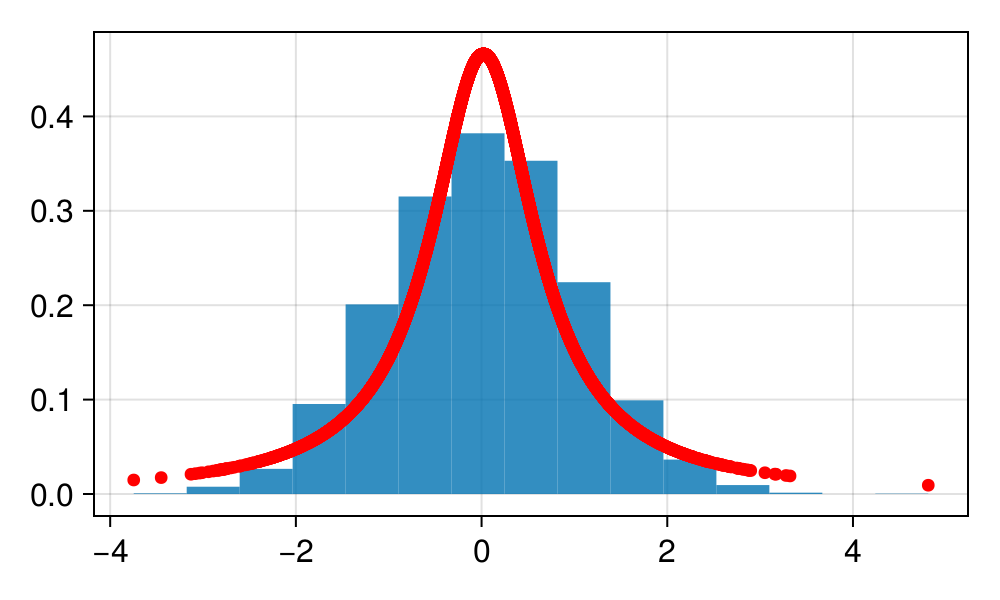

In [ ]:
# plot the fit
hist(x, 50; normalization = :pdf)
scatter!(x, pdf.(cauchyfit, x); color = "red")
current_figure()

Of course, other fundamental statistical measures, e.g. means, stds, quantiles, work out of the box for any distribution.